In [1]:
from transitions import Machine
import random
from transitions.extensions import GraphMachine
from IPython.display import Image, display, display_png

In [2]:
states = ['asleep', 'hanging out', 'hungry', 'sweaty', 'saving the world']
transitions = [
    { 'trigger': 'wake_up', 'source': 'asleep', 'dest': 'hanging out' },
    { 'trigger': 'work_out', 'source': 'hanging out', 'dest': 'hungry' },
    { 'trigger': 'eat', 'source': 'hungry', 'dest': 'hanging out' },
    { 'trigger': 'distress_call', 'source': '*', 'dest': 'saving the world',
                     'before':'change_into_super_secret_costume' },
    { 'trigger': 'complete_mission', 'source': 'saving the world', 'dest': 'sweaty',
                    'after':'update_journal' },
    { 'trigger': 'clean_up', 'source': 'sweaty', 'dest': 'asleep', 'conditions':['is_exhausted'] },
    { 'trigger': 'clean_up', 'source': 'sweaty', 'dest': 'hanging out' },
    { 'trigger': 'nap', 'source': '*', 'dest': 'asleep'}
]
class NarcolepticSuperhero(object):

    # Define some states. Most of the time, narcoleptic superheroes are just like
    # everyone else. Except for...
    states = ['asleep', 'hanging out', 'hungry', 'sweaty', 'saving the world']

    def __init__(self, name):

        # No anonymous superheroes on my watch! Every narcoleptic superhero gets
        # a name. Any name at all. SleepyMan. SlumberGirl. You get the idea.
        self.name = name

        # What have we accomplished today?
        self.kittens_rescued = 0

        # Initialize the state machine
        self.machine = Machine(model=self, states=NarcolepticSuperhero.states, initial='asleep')

        # Add some transitions. We could also define these using a static list of
        # dictionaries, as we did with states above, and then pass the list to
        # the Machine initializer as the transitions= argument.

        # At some point, every superhero must rise and shine.
        self.machine.add_transition(trigger='wake_up', source='asleep', dest='hanging out')

        # Superheroes need to keep in shape.
        self.machine.add_transition('work_out', 'hanging out', 'hungry')

        # Those calories won't replenish themselves!
        self.machine.add_transition('eat', 'hungry', 'hanging out')

        # Superheroes are always on call. ALWAYS. But they're not always
        # dressed in work-appropriate clothing.
        self.machine.add_transition('distress_call', '*', 'saving the world',
                         before='change_into_super_secret_costume')

        # When they get off work, they're all sweaty and disgusting. But before
        # they do anything else, they have to meticulously log their latest
        # escapades. Because the legal department says so.
        self.machine.add_transition('complete_mission', 'saving the world', 'sweaty',
                         after='update_journal')

        # Sweat is a disorder that can be remedied with water.
        # Unless you've had a particularly long day, in which case... bed time!
        self.machine.add_transition('clean_up', 'sweaty', 'asleep', conditions=['is_exhausted'])
        self.machine.add_transition('clean_up', 'sweaty', 'hanging out')

        # Our NarcolepticSuperhero can fall asleep at pretty much any time.
        self.machine.add_transition('nap', '*', 'asleep')

    def update_journal(self):
        """ Dear Diary, today I saved Mr. Whiskers. Again. """
        self.kittens_rescued += 1

    def is_exhausted(self):
        """ Basically a coin toss. """
        return random.random() < 0.5

    def change_into_super_secret_costume(self):
        print("Beauty, eh?")    
    # graph object is created by the machine
    def show_graph(self, **kwargs):
        self.get_graph(**kwargs).draw('state.png', prog='dot')
        display(Image('state.png'))

In [3]:
batman = NarcolepticSuperhero("Batman")
machine = GraphMachine(model=batman, 
                       states=states, 
                       transitions=transitions,
                       initial='asleep',
                       show_auto_transitions=True, # default value is False
                       title="Matter is Fun!",
                       show_conditions=True)

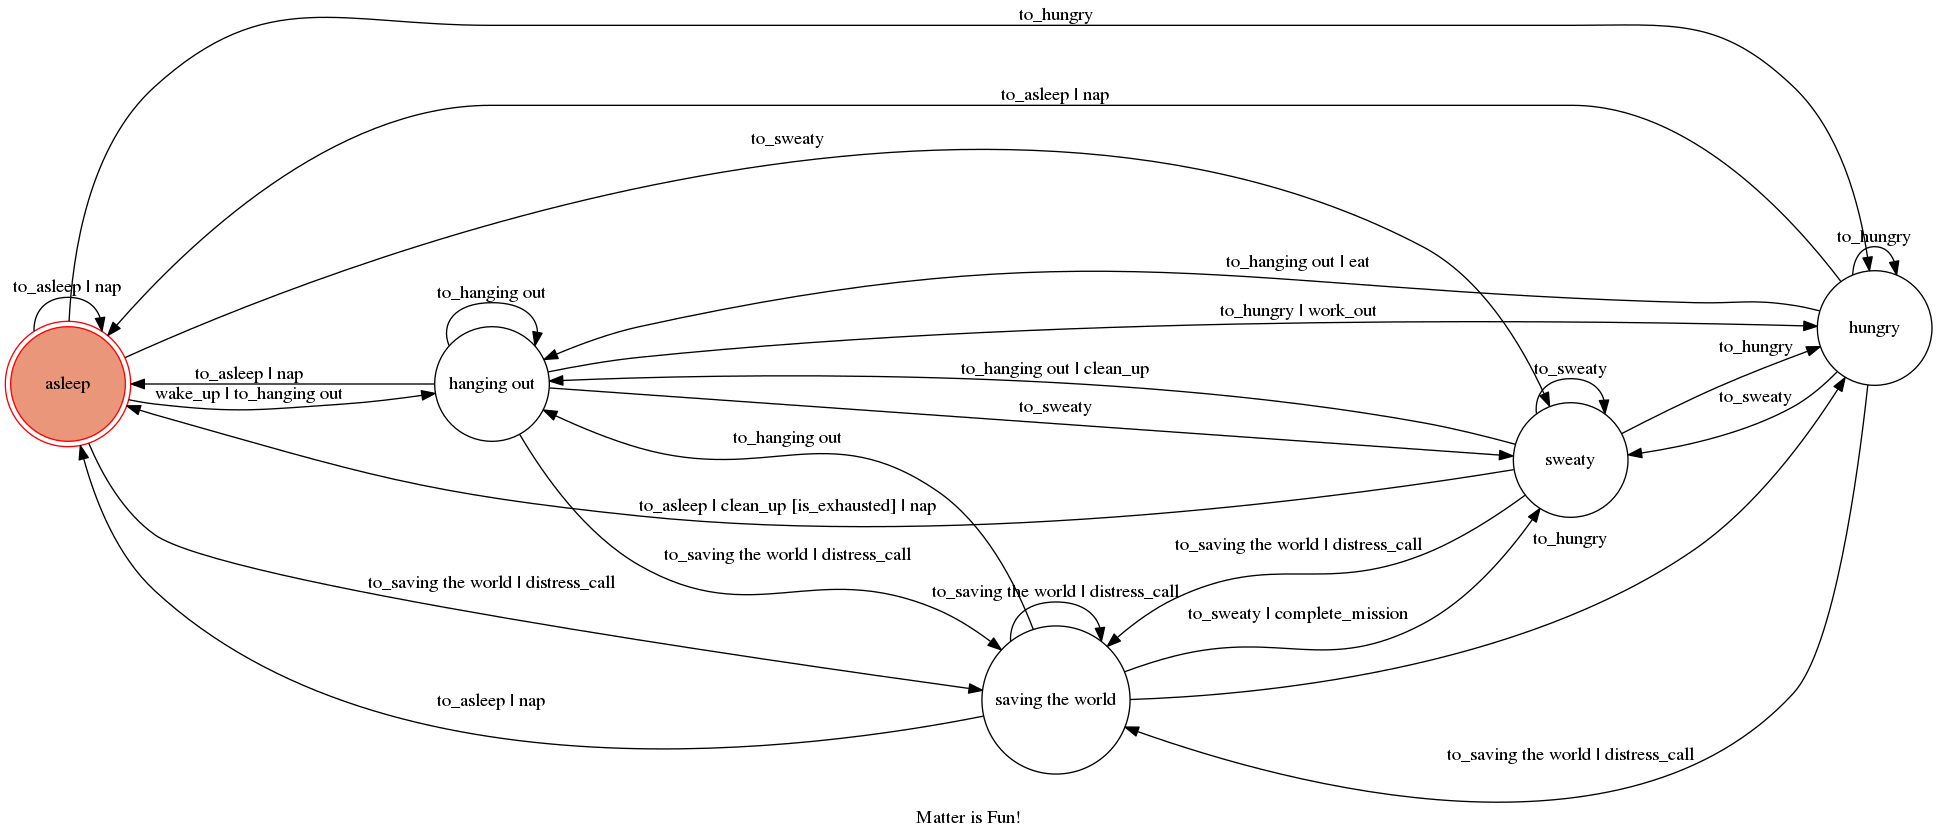

In [4]:
batman.show_graph()

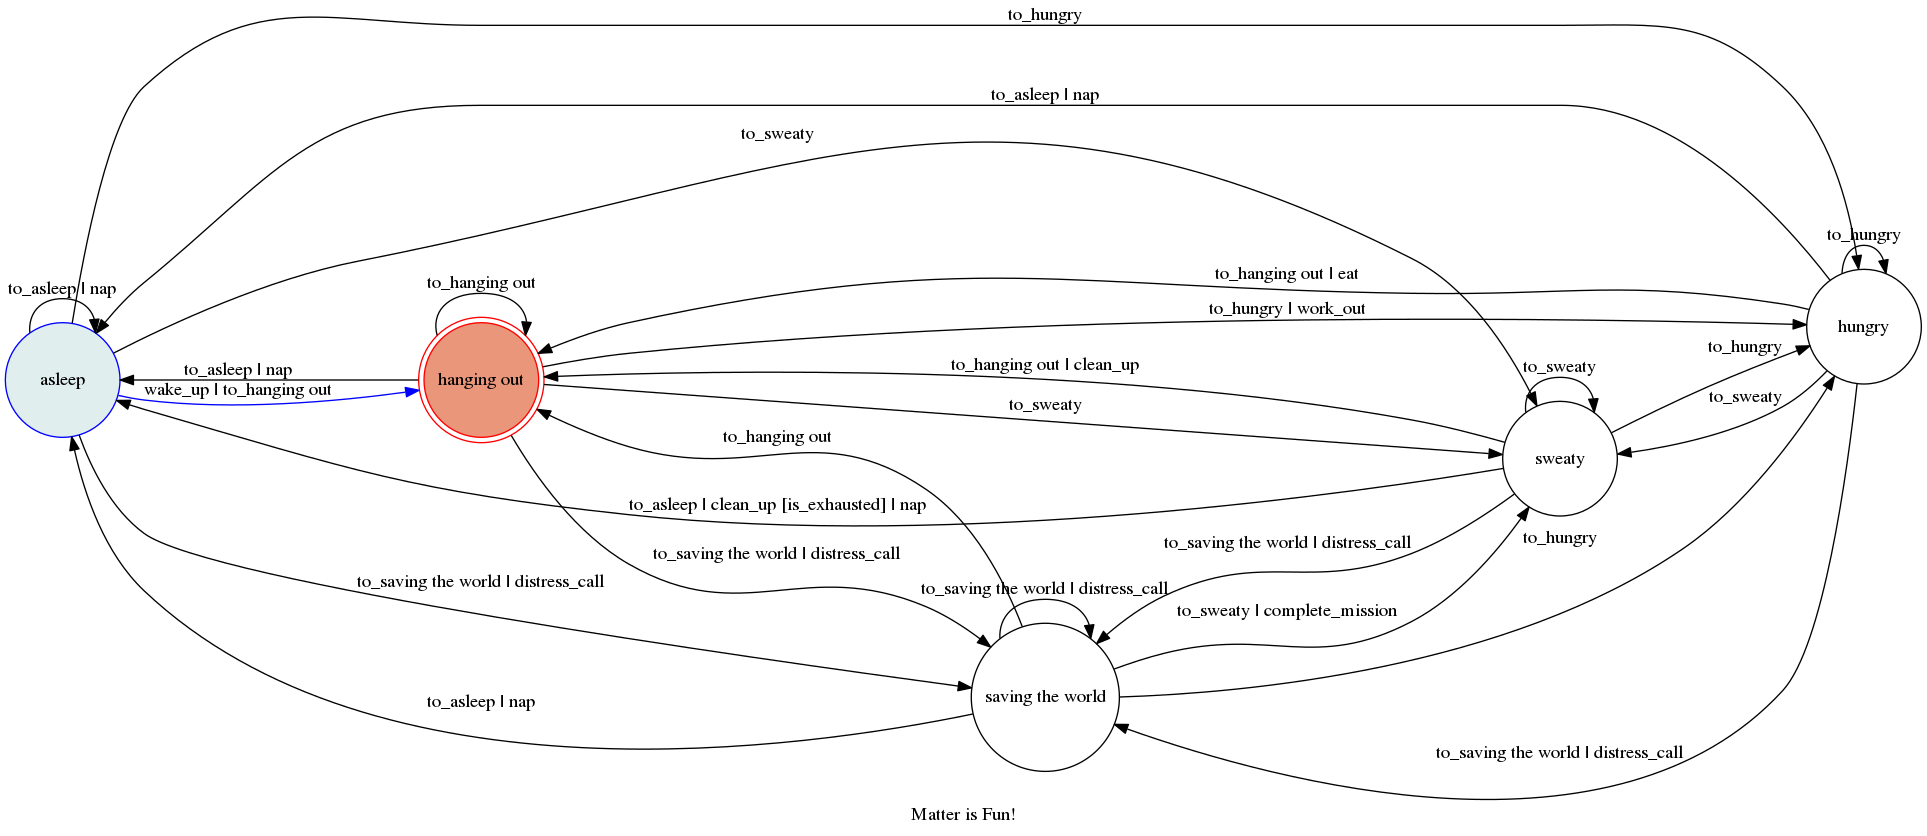

In [5]:
batman.wake_up()
batman.show_graph()

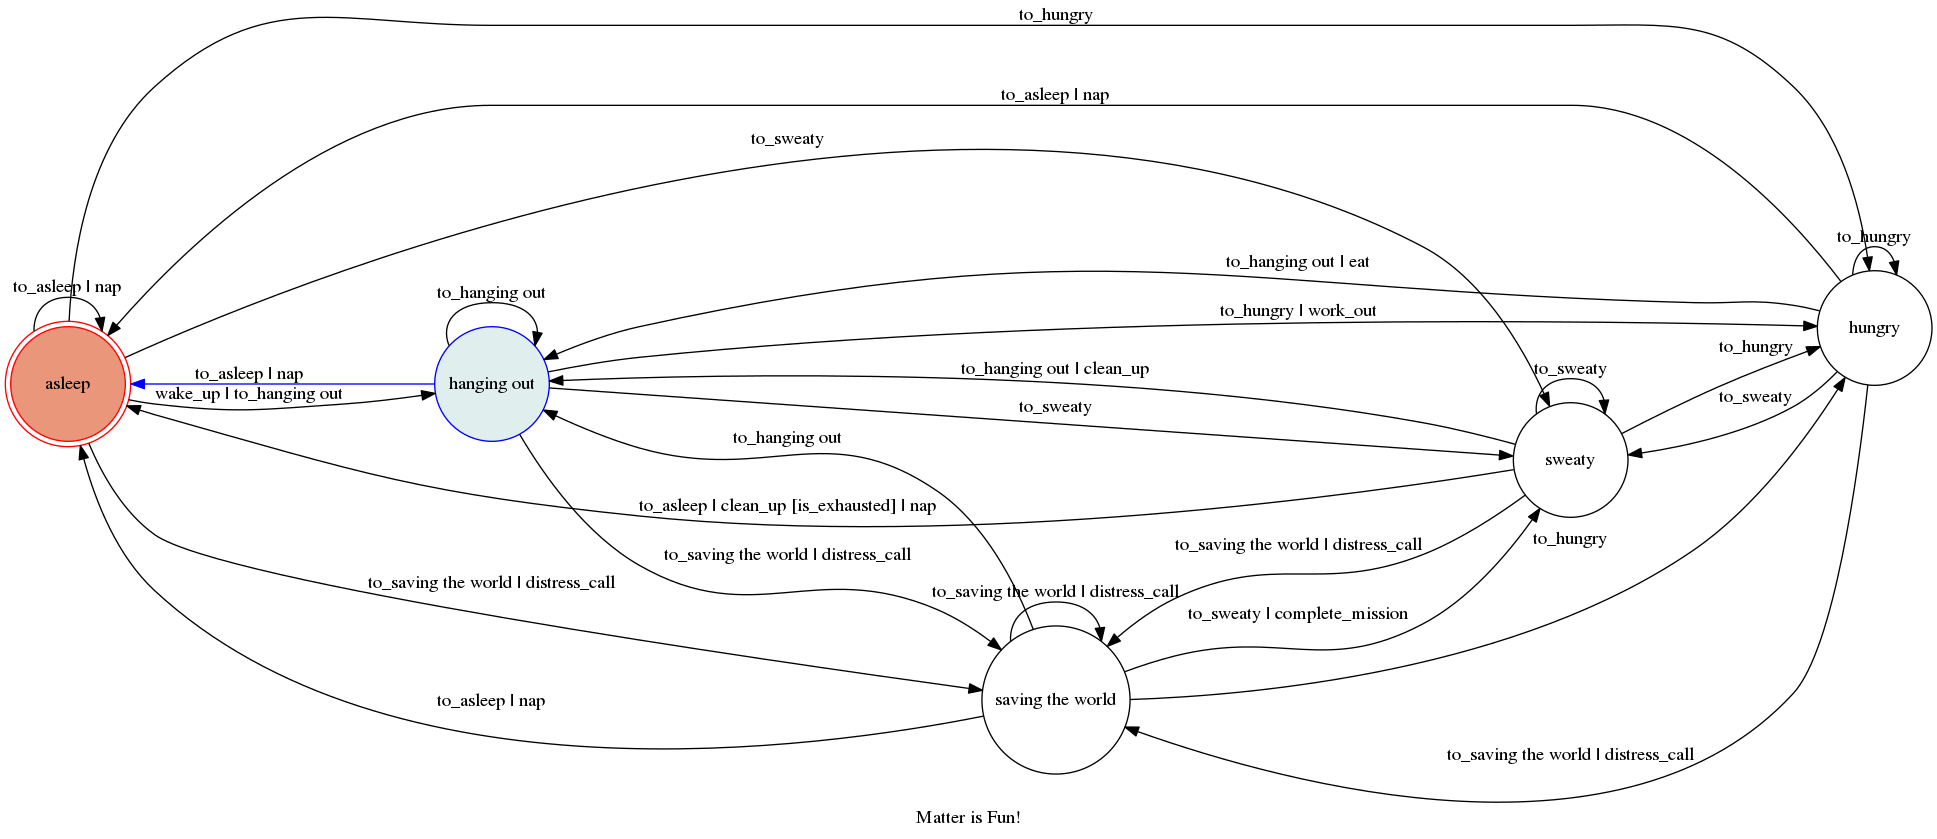

In [6]:
batman.nap()
batman.show_graph()

In [7]:
# batman.clean_up()

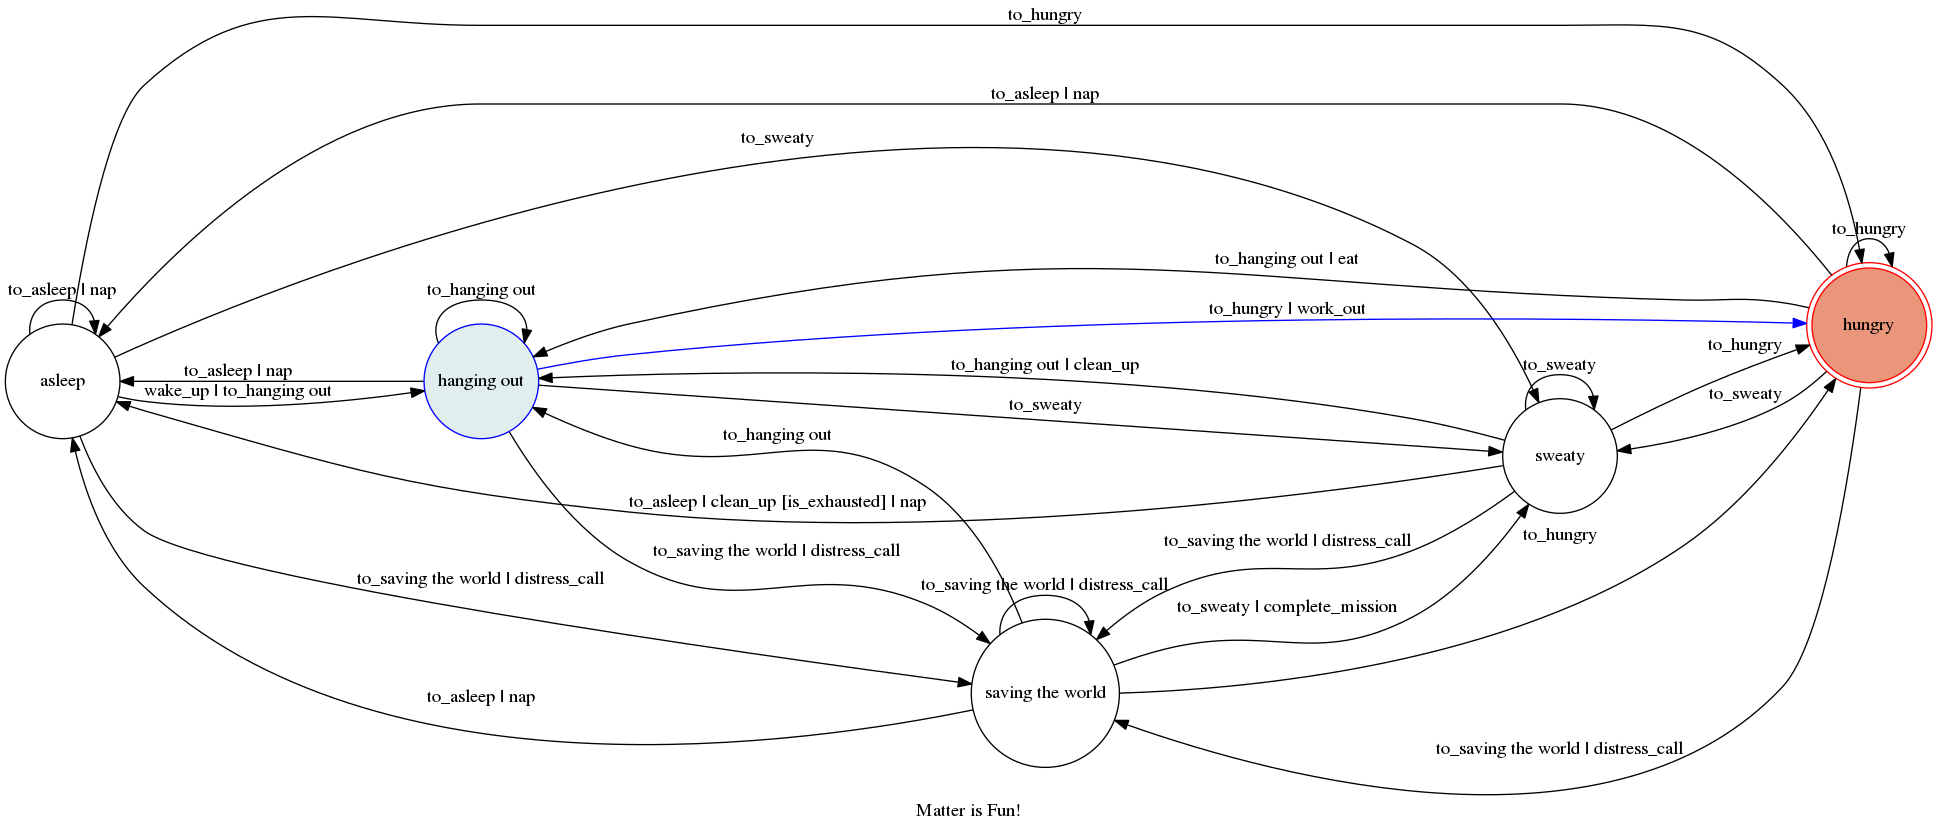

In [8]:
batman.wake_up()
batman.work_out()
batman.show_graph()

In [9]:
batman.kittens_rescued

0

In [10]:
batman.distress_call()

Beauty, eh?


True

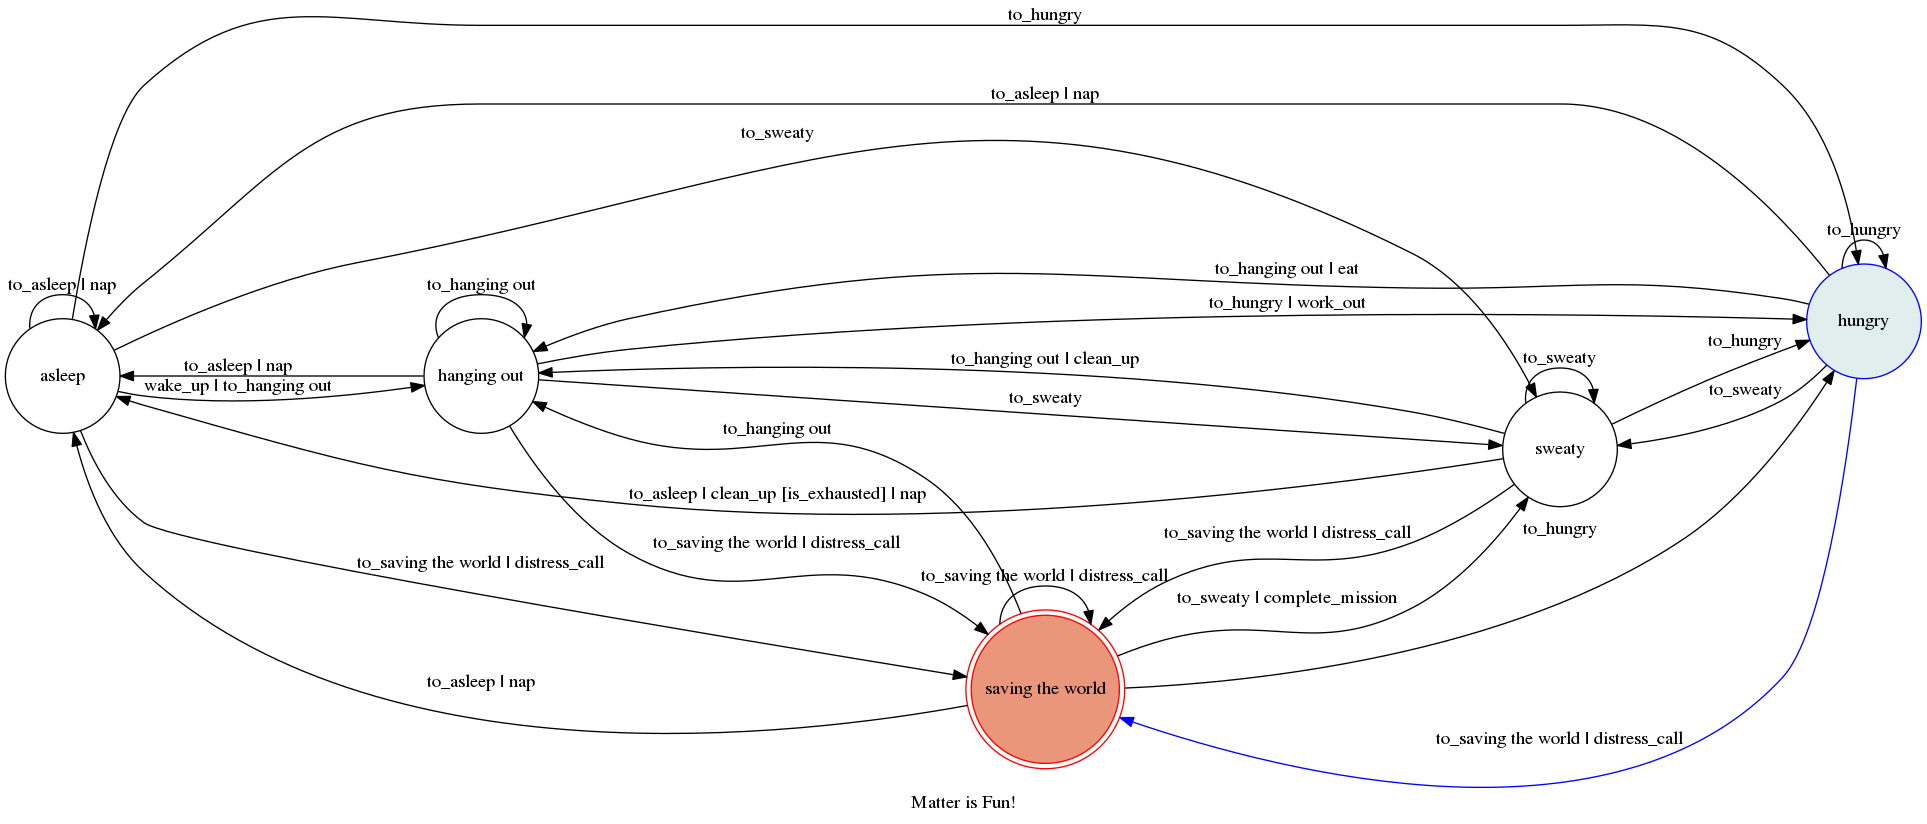

In [11]:
batman.show_graph()

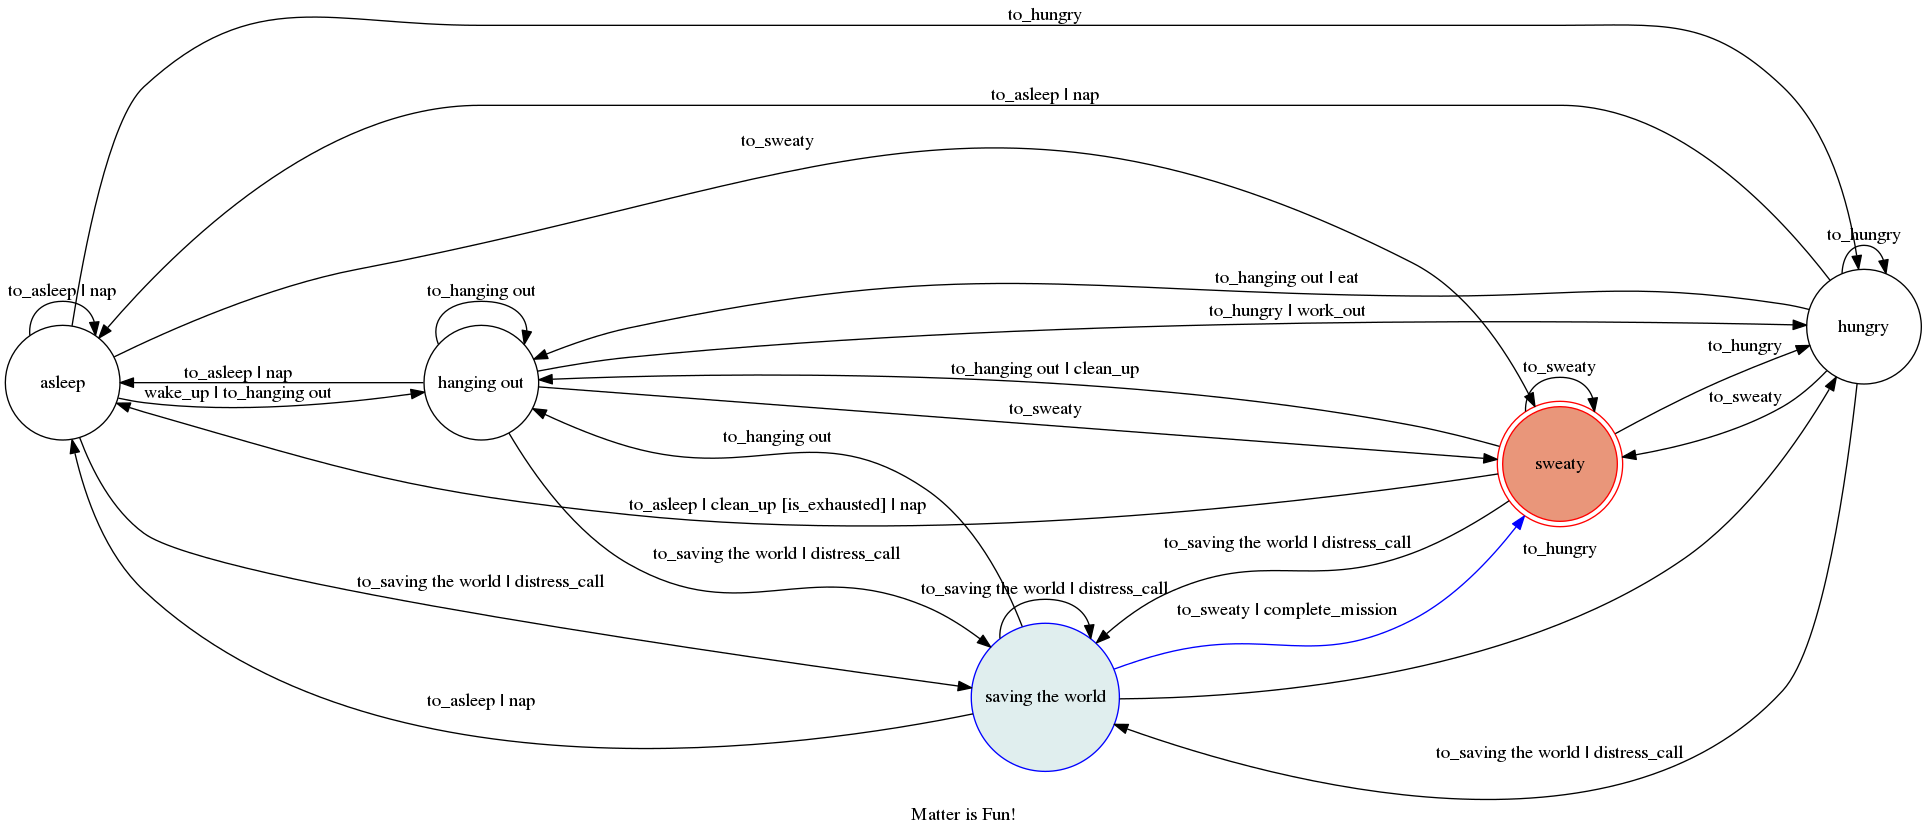

In [12]:
batman.complete_mission()
batman.show_graph()

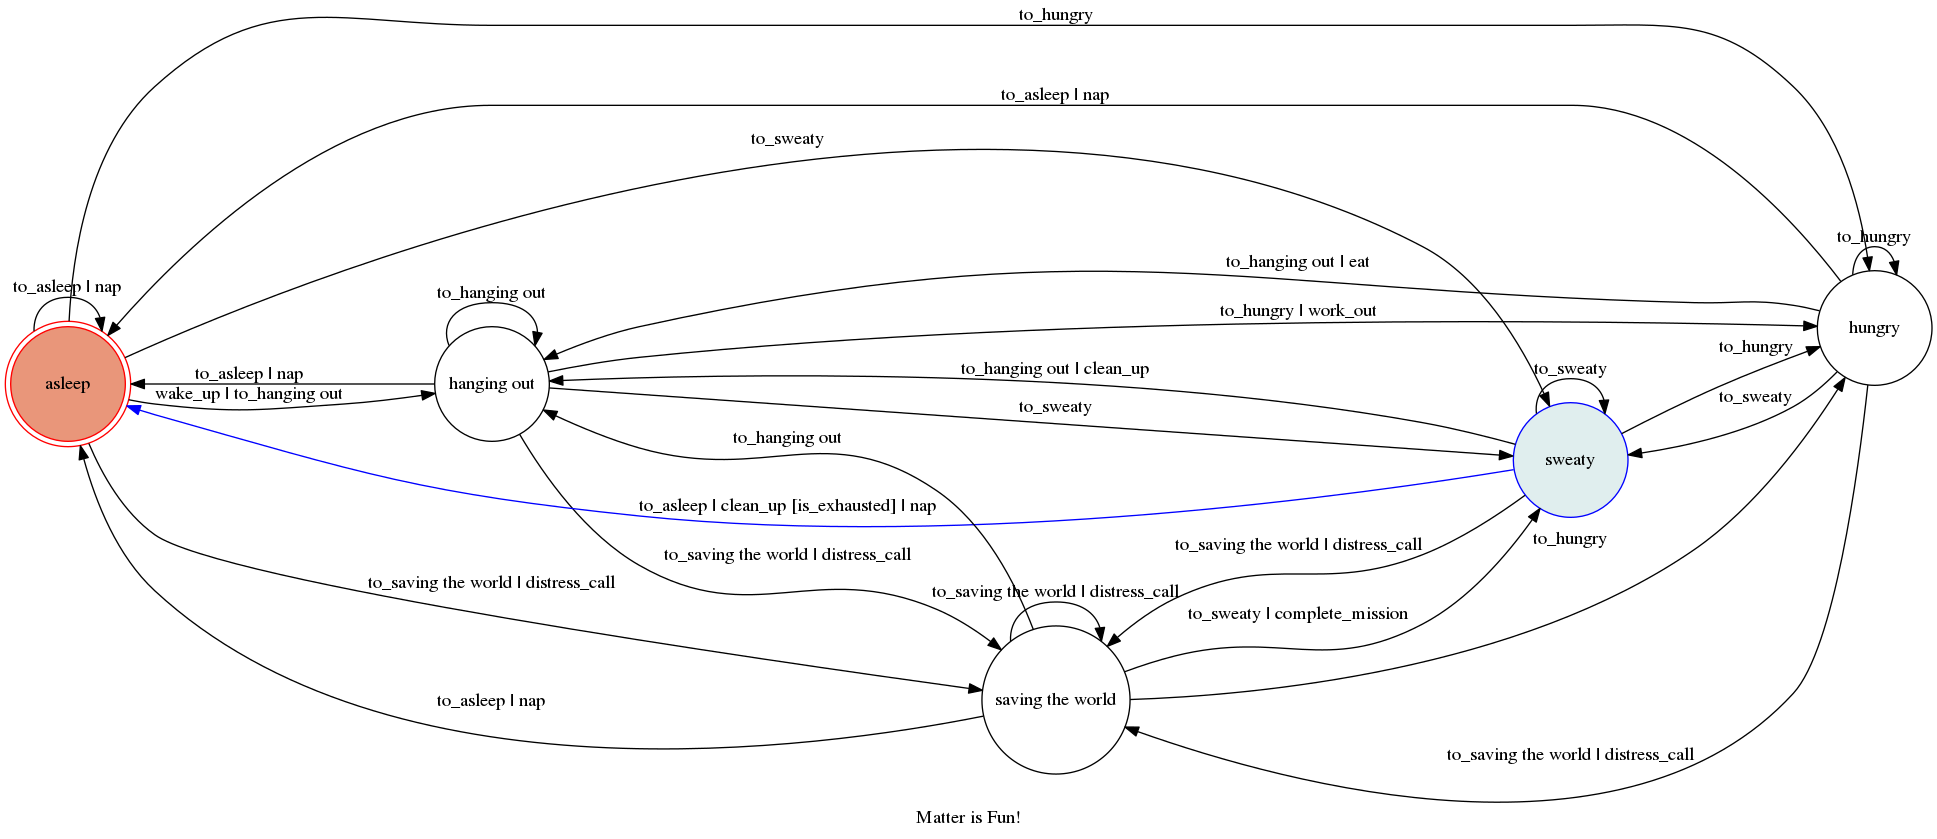

In [13]:
batman.clean_up()
batman.show_graph()

In [14]:
batman.kittens_rescued

1